In [1]:
# Import needed stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import census_api_key
from census import Census
from scipy.stats import linregress

In [2]:
merged_census_MDE_df=pd.read_csv("Merged_MDE_Census_data.csv")


In [3]:
# Part I Start
# Function to create Linear Regression plots
percentsped = []
y_values = []
def linearregression(percentsped): 
    x_axis = percentsped
    y_axis = y_values 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(1,25),fontsize=18,color="red")

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)

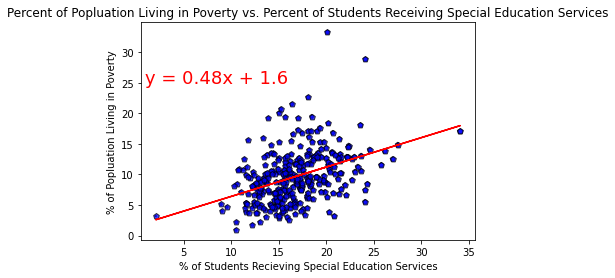

In [4]:
percentsped = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
y_values = merged_census_MDE_df['Percent in Poverty']

linearregression(percentsped)


plt.title("Percent of Popluation Living in Poverty vs. Percent of Students Receiving Special Education Services")
plt.xlabel("% of Students Recieving Special Education Services")
plt.ylabel("% of Popluation Living in Poverty")
plt.show()

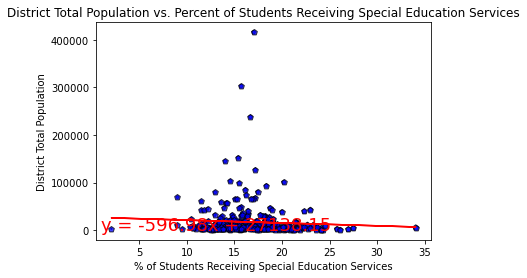

In [5]:
percentsped = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
y_values = merged_census_MDE_df['Population']

linearregression(percentsped)


plt.title("District Total Population vs. Percent of Students Receiving Special Education Services")
plt.xlabel("% of Students Receiving Special Education Services")
plt.ylabel("District Total Population")
plt.show()

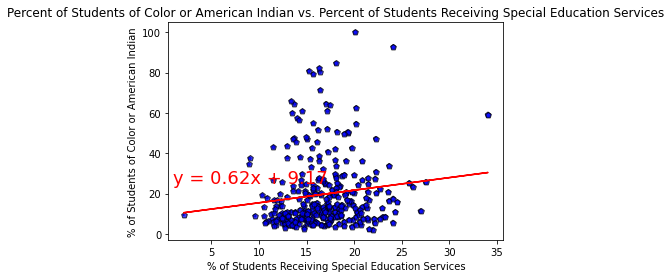

In [6]:
percentsped = merged_census_MDE_df['Percent of Students Receiving Special Education Services']
y_values = merged_census_MDE_df['Percent of Students of Color or American Indian']

linearregression(percentsped)


plt.title("Percent of Students of Color or American Indian vs. Percent of Students Receiving Special Education Services")
plt.xlabel("% of Students Receiving Special Education Services")
plt.ylabel("% of Students of Color or American Indian")
plt.show()

In [7]:
# Part I End

In [8]:
# Part II Start

In [9]:
# Part II End

In [10]:
# Part III Start

In [11]:
# Part III End

In [12]:
# Part IV Start

In [13]:
# Part IV End